<a href="https://colab.research.google.com/github/mellalbuquerque/fashiondata/blob/main/fashion_analytics_revenue_%26_trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('retail_dataset.csv', sep=";", encoding="utf-8")
df.head()

,Consumer ID,Order ID,Month,Year,Period,Total order value,Discount,Line Value (net discount),Line SKU Production Cost,Line Category,Line SKU,Average Time between Purchases
0,13121938,13121938B,3,2020,01/03/2020,168 €,0 €,168 €,25 €,Small leather goods,SMA4,NaN
1,13121938,13121938C,5,2020,01/05/2020,220 €,0 €,220 €,40 €,Fragrances,FRA4,2.0
2,13121938,13121938D,7,2020,01/07/2020,240 €,0 €,240 €,43 €,Fragrances,FRA5,2.0
3,13139819,13139819A,1,2020,01/01/2020,313 €,63 €,250 €,94 €,Accessories,ACC4,NaN
4,13139819,13139819B,9,2020,01/09/2020,951 €,0 €,951 €,247 €,Mini bags,MIN3,8.0


In [3]:
print(df.columns)

Index(['Consumer ID', 'Order ID', 'Month', 'Year', 'Period',
       'Total order value', 'Discount', 'Line Value (net discount)',
       'Line SKU Production Cost', 'Line Category', 'Line SKU',
       'Average Time between Purchases'],
      dtype='object')


In [4]:
print(df.dtypes)

Consumer ID                         int64
Order ID                           object
Month                               int64
Year                                int64
Period                             object
Total order value                  object
Discount                           object
Line Value (net discount)          object
Line SKU Production Cost           object
Line Category                      object
Line SKU                           object
Average Time between Purchases    float64
dtype: object


In [5]:
# Lista das colunas numéricas que estão como objeto
cols_monetarias = [
    "Total order value", "Discount", "Line Value (net discount)", "Line SKU Production Cost"
]

# Remover o símbolo do euro e converter para float
for col in cols_monetarias:
    df[col] = df[col].str.replace("€", "").str.replace(",", ".").str.strip().astype(float)

# Converter a coluna "Period" para formato de data
df["Period"] = pd.to_datetime(df["Period"], format="%d/%m/%Y")

# Verificar os tipos de dados após conversão
print(df.dtypes)


Consumer ID                                int64
Order ID                                  object
Month                                      int64
Year                                       int64
Period                            datetime64[ns]
Total order value                        float64
Discount                                 float64
Line Value (net discount)                float64
Line SKU Production Cost                 float64
Line Category                             object
Line SKU                                  object
Average Time between Purchases           float64
dtype: object


In [6]:
# Contar valores NaN por coluna
nan_por_coluna = df.isna().sum()

# Contar o total de NaN no dataset
total_nan = df.isna().sum().sum()

print("Valores NaN por coluna:")
print(nan_por_coluna)
print("\nTotal de valores NaN no dataset:", total_nan)


Valores NaN por coluna:
Consumer ID                          0
Order ID                             0
Month                                0
Year                                 0
Period                               0
Total order value                    0
Discount                             0
Line Value (net discount)            0
Line SKU Production Cost             0
Line Category                        0
Line SKU                             0
Average Time between Purchases    3188
dtype: int64

Total de valores NaN no dataset: 3188


In [7]:
print(df.shape)

(3678, 12)


In [8]:
df.drop(columns=["Average Time between Purchases"], inplace=True)


In [9]:
print(df.shape)

(3678, 11)




---



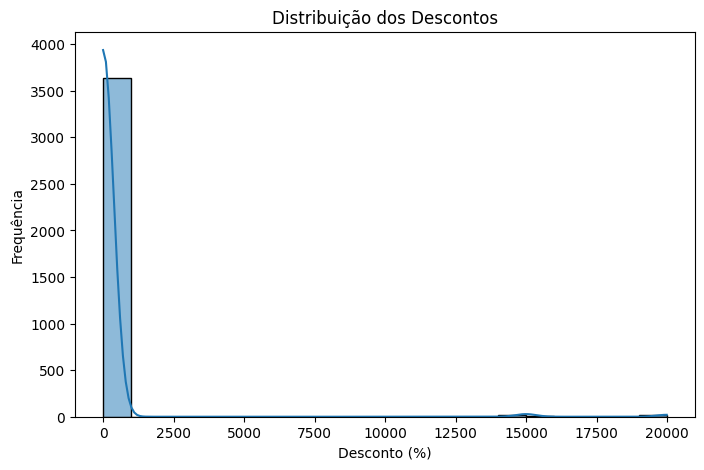

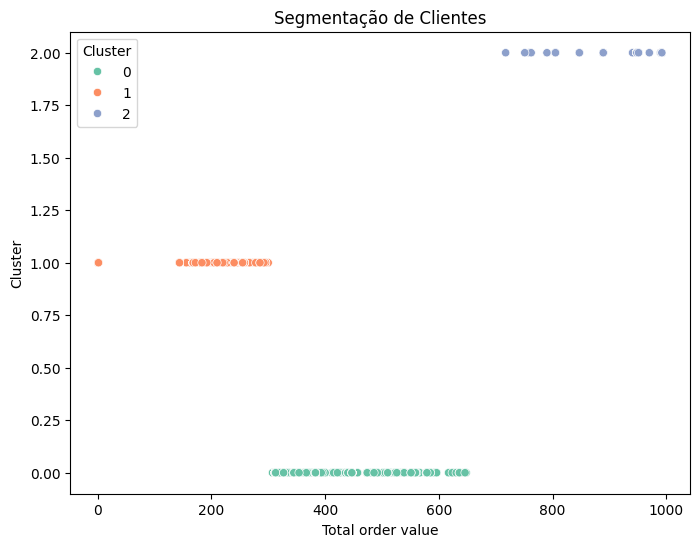

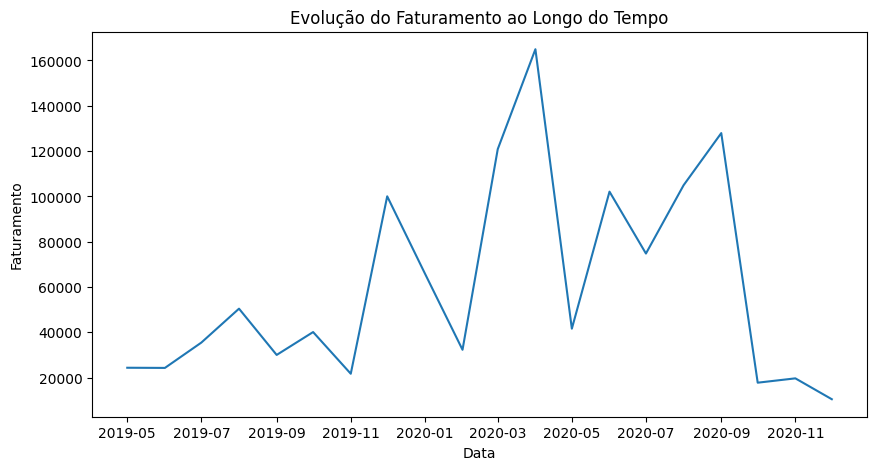

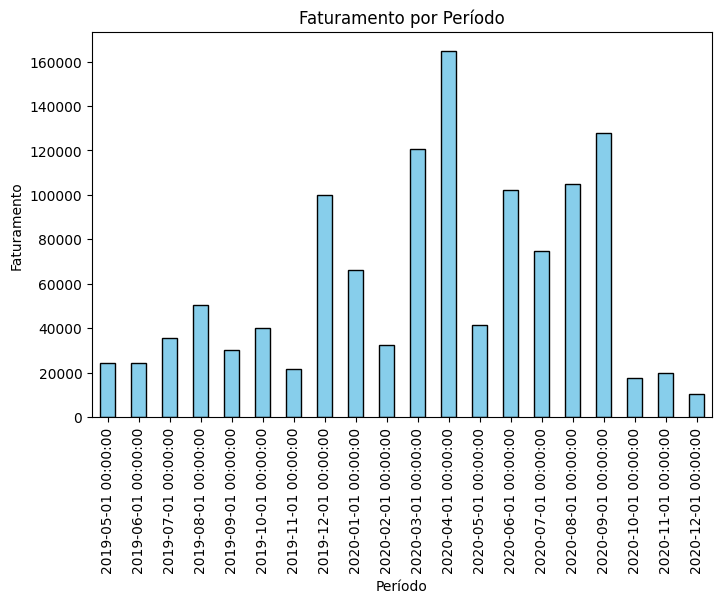

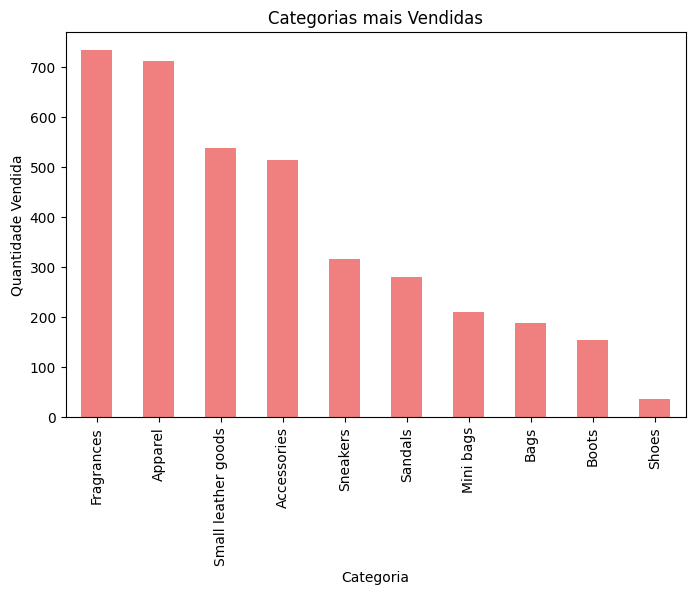

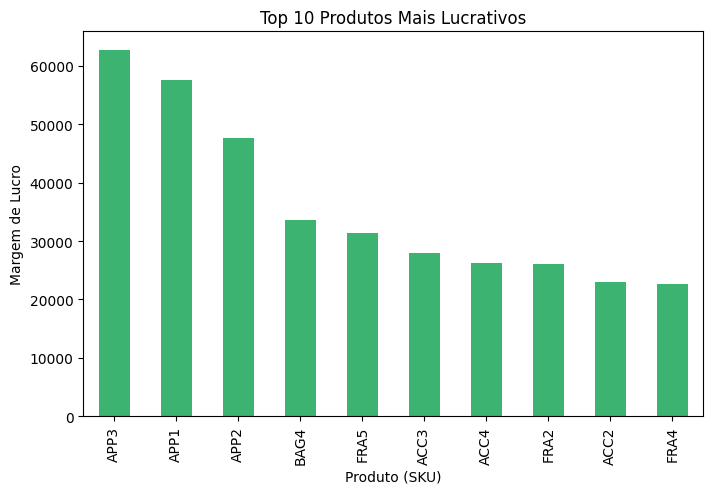

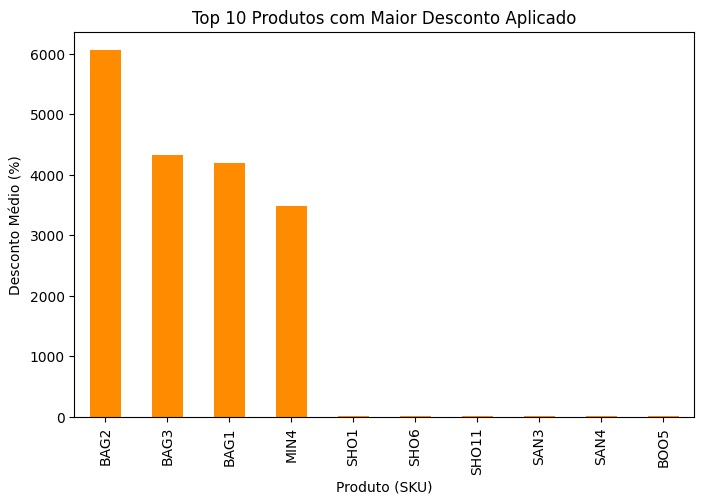

Faturamento Total: 1210212.7000000002
Margem de Lucro Média: 195.86134937466014
Rentabilidade Média por Pedido: 212.19


In [13]:
### 1. Análise de Receita e Descontos ###

# Faturamento total
faturamento_total = df["Total order value"].sum()

# Impacto dos descontos
df["Desconto Aplicado (%)"] = (df["Discount"] / df["Total order value"]) * 100
impacto_descontos = df[["Total order value", "Discount", "Desconto Aplicado (%)"]].describe()

# Margem de lucro
df["Margem de Lucro"] = df["Line Value (net discount)"] - df["Line SKU Production Cost"]
margem_media = df["Margem de Lucro"].mean()

# Distribuição de descontos
plt.figure(figsize=(8, 5))
sns.histplot(df["Desconto Aplicado (%)"].dropna(), bins=20, kde=True)
plt.xlabel("Desconto (%)")
plt.ylabel("Frequência")
plt.title("Distribuição dos Descontos")
plt.show()

### 2. Análise de Clientes (SEM "Average Time between Purchases") ###

# Número de compras por cliente
compras_por_cliente = df.groupby("Consumer ID")["Order ID"].nunique()

# Valor médio do pedido (AOV)
aov = df.groupby("Consumer ID")["Total order value"].mean()

# Clusterização de clientes baseada apenas no ticket médio
clientes_df = df.groupby("Consumer ID")[["Total order value"]].mean()

# Aplicar K-Means para segmentação
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clientes_df["Cluster"] = kmeans.fit_predict(clientes_df)

# Visualizar clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clientes_df, x="Total order value", y="Cluster", hue="Cluster", palette="Set2")
plt.title("Segmentação de Clientes")
plt.show()

### 3. Análise Temporal ###

# Converter "Period" para data
df["Period"] = pd.to_datetime(df["Period"], format="%d/%m/%Y")

# Evolução das vendas por mês
df["Data"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str))
vendas_mensais = df.groupby("Data")["Total order value"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(data=vendas_mensais)
plt.xlabel("Data")
plt.ylabel("Faturamento")
plt.title("Evolução do Faturamento ao Longo do Tempo")
plt.show()

# Comparação de vendas por período
vendas_periodo = df.groupby("Period")["Total order value"].sum()
vendas_periodo.plot(kind="bar", figsize=(8, 5), color="skyblue", edgecolor="black")
plt.xlabel("Período")
plt.ylabel("Faturamento")
plt.title("Faturamento por Período")
plt.show()

### 4. Análise de Produtos ###

# Categorias mais vendidas
categorias_vendas = df["Line Category"].value_counts()

plt.figure(figsize=(8, 5))
categorias_vendas.plot(kind="bar", color="lightcoral")
plt.xlabel("Categoria")
plt.ylabel("Quantidade Vendida")
plt.title("Categorias mais Vendidas")
plt.show()

# Produtos mais lucrativos
produtos_lucrativos = df.groupby("Line SKU")["Margem de Lucro"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
produtos_lucrativos.plot(kind="bar", color="mediumseagreen")
plt.xlabel("Produto (SKU)")
plt.ylabel("Margem de Lucro")
plt.title("Top 10 Produtos Mais Lucrativos")
plt.show()

# Produtos com maior desconto aplicado
produtos_descontos = df.groupby("Line SKU")["Desconto Aplicado (%)"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
produtos_descontos.plot(kind="bar", color="darkorange")
plt.xlabel("Produto (SKU)")
plt.ylabel("Desconto Médio (%)")
plt.title("Top 10 Produtos com Maior Desconto Aplicado")
plt.show()

### 5. Análise de Eficiência (Sem Média de Tempo entre Compras) ###

# Rentabilidade geral
df["Rentabilidade"] = df["Total order value"] - df["Line SKU Production Cost"]
rentabilidade_media = df["Rentabilidade"].mean()

print(f"Faturamento Total: {faturamento_total}")
print(f"Margem de Lucro Média: {margem_media}")
print(f"Rentabilidade Média por Pedido: {rentabilidade_media:.2f}")
